In [2]:
import numpy as np
import librosa as lb
import soundfile as sf
from pydub import AudioSegment
import os
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
path = "/home/rajesh/Desktop/Datasets/musdb18hq/train/A Classic Education - NightOwl/"
vocals, fs = lb.load(path+'vocals.wav')
bass, fs = lb.load(path+'bass.wav')
drums, fs = lb.load(path+'drums.wav')
other, fs = lb.load(path+'other.wav')

### Example1

In [85]:
vocals_1 = vocals + 0.1 * bass
vocals_4 = vocals + 0.4 * bass
vocals_6 = vocals + 0.6 * bass
vocals_8 = vocals + 0.8 * bass
vocals_10 = vocals + 1 * bass

In [86]:
one = vocals[0:44100] 
two = vocals_1[44100:88200] 
three = vocals[88200:132300] 
four = vocals_4[132300:176400] 
five = vocals[176400:220500] 
six = vocals_6[220500:264600] 
seven = vocals[264600:308700] 
eight = vocals_8[308700:352800] 
nine = vocals[352800:396900]
ten = vocals_10[396900:441000]

In [87]:
overall = np.hstack([one, two, three, four, five, six, seven, eight, nine, ten])

In [88]:
bass_resrt = bass[:len(overall)]

In [113]:
corr = []
step = int(fs * 0.1) #0.25 seconds
for i in range(0, len(overall), step):
    corr.append(np.correlate(overall[i:i+step], bass_resrt[i:i+step]))

In [114]:
corr = np.hstack(corr)

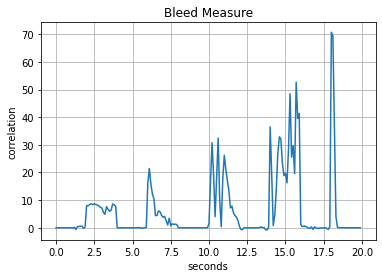

In [115]:
x_ = np.arange(len(corr))
plt.plot(x_*step/fs, corr)
plt.xlabel('seconds')
plt.ylabel('correlation')
plt.title('Bleed Measure')
plt.grid()
plt.show()

### Example2

In [117]:
vocals_1 = vocals + 0.1 * drums
vocals_4 = vocals + 0.4 * drums
vocals_6 = vocals + 0.6 * drums
vocals_8 = vocals + 0.8 * drums
vocals_10 = vocals + 1 * drums

In [118]:
one = vocals[0:44100] 
two = vocals_1[44100:88200] 
three = vocals[88200:132300] 
four = vocals_4[132300:176400] 
five = vocals[176400:220500] 
six = vocals_6[220500:264600] 
seven = vocals[264600:308700] 
eight = vocals_8[308700:352800] 
nine = vocals[352800:396900]
ten = vocals_10[396900:441000]

In [119]:
overall = np.hstack([one, two, three, four, five, six, seven, eight, nine, ten])

In [120]:
drums_resrt = drums[:len(overall)]

In [122]:
corr = []
step = int(fs * 0.1) #0.25 seconds
for i in range(0, len(overall), step):
    corr.append(np.correlate(overall[i:i+step], drums_resrt[i:i+step]))
    
corr = np.hstack(corr)

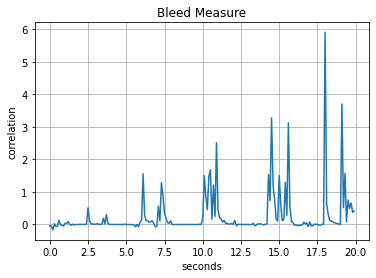

In [123]:
x_ = np.arange(len(corr))
plt.plot(x_*step/fs, corr)
plt.xlabel('seconds')
plt.ylabel('correlation')
plt.title('Bleed Measure')
plt.grid()
plt.show()

### Example3

In [127]:
vocals_1 = vocals + 0.1 * other
vocals_4 = vocals + 0.4 * other
vocals_6 = vocals + 0.6 * other
vocals_8 = vocals + 0.8 * other
vocals_10 = vocals + 1 * other

In [128]:
one = vocals[0:44100] 
two = vocals_1[44100:88200] 
three = vocals[88200:132300] 
four = vocals_4[132300:176400] 
five = vocals[176400:220500] 
six = vocals_6[220500:264600] 
seven = vocals[264600:308700] 
eight = vocals_8[308700:352800] 
nine = vocals[352800:396900]
ten = vocals_10[396900:441000]

In [129]:
overall = np.hstack([one, two, three, four, five, six, seven, eight, nine, ten])

In [130]:
other_resrt = other[:len(overall)]

In [131]:
corr = []
step = int(fs * 0.1) #0.25 seconds
for i in range(0, len(overall), step):
    corr.append(np.correlate(overall[i:i+step], other_resrt[i:i+step]))
    
corr = np.hstack(corr)

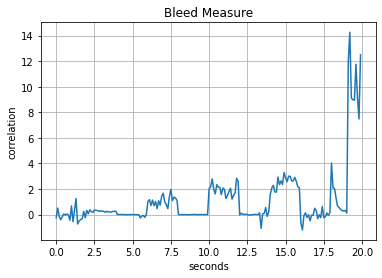

In [132]:
x_ = np.arange(len(corr))
plt.plot(x_*step/fs, corr)
plt.xlabel('seconds')
plt.ylabel('correlation')
plt.title('Bleed Measure')
plt.grid()
plt.show()

### Example4

In [151]:
vocals_1 = vocals + 0.1 * bass + 0.1 * drums + 0.1 * other
vocals_4 = vocals + 0.4 * bass + 0.4 * drums + 0.4 * other
vocals_6 = vocals + 0.6 * bass + 0.6 * drums + 0.6 * other
vocals_8 = vocals + 0.8 * bass + 0.8 * drums + 0.8 * other
vocals_10 = vocals + bass + drums + other

In [152]:
one = vocals[0:44100] 
two = vocals_1[44100:88200] 
three = vocals[88200:132300] 
four = vocals_4[132300:176400] 
five = vocals[176400:220500] 
six = vocals_6[220500:264600] 
seven = vocals[264600:308700] 
eight = vocals_8[308700:352800] 
nine = vocals[352800:396900]
ten = vocals_10[396900:441000]

In [153]:
overall = np.hstack([one, two, three, four, five, six, seven, eight, nine, ten])

In [154]:
vocal_resrt = vocals[:len(overall)]

In [159]:
corr = []
step = int(fs * 0.1) #0.25 seconds
for i in range(0, len(overall), step):
    corr.append(np.correlate(overall[i:i+step], vocal_resrt[i:i+step]))
    
corr = np.hstack(corr)

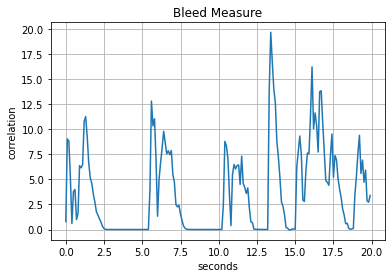

In [160]:
x_ = np.arange(len(corr))
plt.plot(x_*step/fs, corr)
plt.xlabel('seconds')
plt.ylabel('correlation')
plt.title('Bleed Measure')
plt.grid()
plt.show()